### audio_data processing

In [ ]:
import os, sys
from os.path import dirname, abspath, basename, exists, splitext
from os.path import join as joinPath

DUPLICATE_MARKER = ₩'1'

def flattenFiles( here ):
    '''Move all files in subdirs to here, then delete subdirs.
       Conflicting files are renamed, with 1 appended to their name.'''
    for root, dirs, files in os.walk( here, topdown=False ):
        if root != here:
            for name in files:
                source = joinPath( root, name )
                target = handleDuplicates( joinPath( here, name ) )
                os.rename( source, target )

        for name in dirs:
            os.rmdir( joinPath( root, name ) )

def handleDuplicates( target ):
    while exists( target ):
        base, ext = splitext( target )
        target    = base + DUPLICATE_MARKER + ext
    return target

### necessary libraries: resemblyzer, pyannote

In [2]:
from resemblyzer import preprocess_wav, VoiceEncoder
from demo_utils import *
from itertools import groupby
from pathlib import Path
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False 
plt.rcParams["font.family"] = 'NanumGothic'

### utterance embedding: umap projection
- compare speech utterances between iptv speakers
- metric: how similar their sounds

In [4]:
def plot_projection_adv(embeds, speakers, ax=None, colors=None, markers=None, legend=True, 
                        title="", **kwargs):
    if ax is None:
        _, ax = plt.subplots(figsize=(10, 10))
        
    reducer = UMAP(n_neighbors=30, min_dist=0.2, **kwargs) # 2D projections
    projs = reducer.fit_transform(embeds)  # projs.shape
    speakers = np.array(speakers)
    
    for i, speaker in enumerate(np.unique(speakers)):
        speaker_projs = projs[speakers == speaker]
        marker = "o" if markers is None else markers[i]
        label = speaker if legend else None
        ax.scatter(*speaker_projs.T, cmap=plt.cm.Blues, 
                    marker=marker, label=label, alpha=0.7)

    if legend:
        ax.legend(title="Speakers", ncol=2, loc="upper right")
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect("auto")
    
    return projs

In [25]:
wav_fpaths_3 = list(Path("audio_data", "iptv_uttr", "total").glob("**/*.wav"))
speakers_3 = list(map(lambda wav_fpath: wav_fpath.parent.stem, wav_fpaths_3))
wavs_3 = np.array(list(map(preprocess_wav, tqdm(wav_fpaths_3, "Preprocessing wavs", len(wav_fpaths_3), position=0))))
speaker_wavs_3 = {speaker: wavs_3[list(indices)] for speaker, indices in 
                  groupby(range(len(wavs_3)), lambda i: speakers_3[i])} 

## Compute the embeddings
encoder_3 = VoiceEncoder()
utterance_embeds_3 = np.array(list(map(encoder_3.embed_utterance, wavs_3)))

Preprocessing wavs: 100%|██████████| 6446/6446 [01:48<00:00, 59.27it/s]
Loaded the voice encoder model on cpu in 0.05 seconds.
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

Traceback (most recent call last):
  File "/Users/kwang/anaconda3/envs/sr_base/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-25-cd609d90e666>", line 9, in <module>
    utterance_embeds_3 = np.array(list(map(encoder_3.embed_utterance, wavs_3)))
  File "/Users/kwang/Desktop/sr-iptv-proto/resemblyzer/voice_encoder.py", line 156, in embed_utterance
    partial_embeds = self(mels).cpu().numpy()
  File "/Users/kwang/anaconda3/envs/sr_base/lib/python3.7/site-packages/torch/nn/modules/module.py", line 727, in _call_impl
    result = self.forward(*input, **kwargs)
  File "/Users/kwang/Desktop/sr-iptv-proto/resemblyzer/voice_encoder.py", line 62, in fo

TypeError: object of type 'NoneType' has no len()

In [ ]:
encoder_3

In [ ]:
print(utterance_embeds_3)
print(utterance_embeds_3.shape)

In [6]:
for key, value in sorted(speaker_wavs_3.items()):
    print(key, len(value))

곽병주 153
김나영 152
김민규 154
김성일 182
김윤재 152
김지현 161
김진주 151
김훈 183
류성균 157
문성재 140
박민선 151
박상훈 147
박지웅 186
박지혜 171
백광제 157
서종현 151
송화영 140
신광수 152
신윤호 140
신종수 151
양재영 140
오상원 163
유수민 140
윤군후 159
윤민섭 140
윤수연 146
이다슬 151
이미옥 184
이민섭 169
이세희 176
이윤규 139
임나리 157
장하진 141
정성우 177
조창수 140
조현철 142
최가희 148
최동훈 175
최해문 178
하미향 184
허설 166


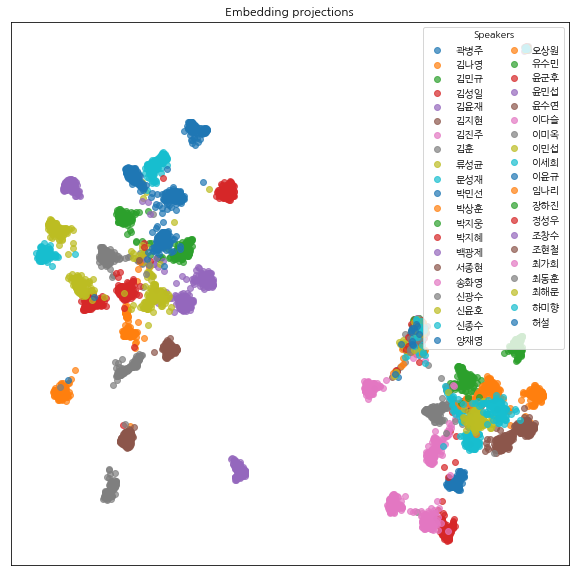

In [53]:
plot_projection_adv(utterance_embeds_3, speakers_3, title="Embedding projections")
plt.show()

In [10]:
wav_fpaths = list(Path("audio_data", "iptv_uttr", "sample").glob("**/*.wav"))
speakers = list(map(lambda wav_fpath: wav_fpath.parent.stem, wav_fpaths))
wavs = np.array(list(map(preprocess_wav, tqdm(wav_fpaths, "Preprocessing wavs", len(wav_fpaths), position=0))))
speaker_wavs = {speaker: wavs[list(indices)] for speaker, indices in 
                groupby(range(len(wavs)), lambda i: speakers[i])}

Preprocessing wavs: 100%|██████████| 1580/1580 [00:11<00:00, 137.87it/s]


In [11]:
encoder = VoiceEncoder()
utterance_embeds = np.array(list(map(encoder.embed_utterance, wavs)))

Loaded the voice encoder model on cuda in 0.03 seconds.


In [14]:
encoder

VoiceEncoder(
  (lstm): LSTM(40, 256, num_layers=3, batch_first=True)
  (linear): Linear(in_features=256, out_features=256, bias=True)
  (relu): ReLU()
)

In [12]:
print(utterance_embeds)
print(utterance_embeds.shape)

[[0.1429932  0.         0.08203338 ... 0.         0.02254576 0.        ]
 [0.0824085  0.         0.09048542 ... 0.         0.         0.        ]
 [0.10434511 0.03245925 0.01089699 ... 0.         0.         0.        ]
 ...
 [0.11729597 0.02526935 0.00973654 ... 0.         0.0406806  0.        ]
 [0.08629341 0.         0.07767767 ... 0.         0.         0.        ]
 [0.04871748 0.         0.03460011 ... 0.         0.         0.        ]]
(1580, 256)


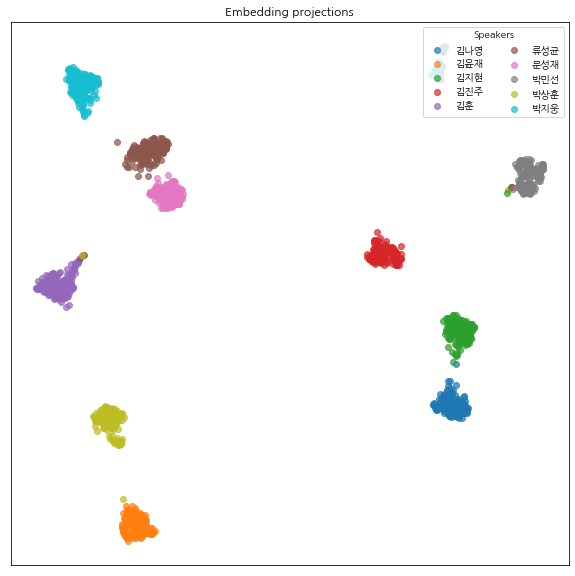

In [57]:
## Project the embeddings in 2D space
plot_projection_adv(utterance_embeds, speakers, title="Embedding projections")
plt.show()

In [59]:
wav_fpaths_2 = list(Path("audio_data", "iptv_uttr", "sample2").glob("**/*.wav"))
speakers_2 = list(map(lambda wav_fpath: wav_fpath.parent.stem, wav_fpaths_2))
wavs_2 = np.array(list(map(preprocess_wav, tqdm(wav_fpaths_2, "Preprocessing wavs", len(wav_fpaths_2), position=0))))
speaker_wavs_2 = {speaker: wavs_2[list(indices)] for speaker, indices in 
                    groupby(range(len(wavs_2)), lambda i: speakers_2[i])} 

## Compute the embeddings
encoder_2 = VoiceEncoder()
utterance_embeds_2 = np.array(list(map(encoder_2.embed_utterance, wavs_2)))

Preprocessing wavs: 100%|██████████| 1608/1608 [00:11<00:00, 135.69it/s]
Loaded the voice encoder model on cuda in 0.01 seconds.


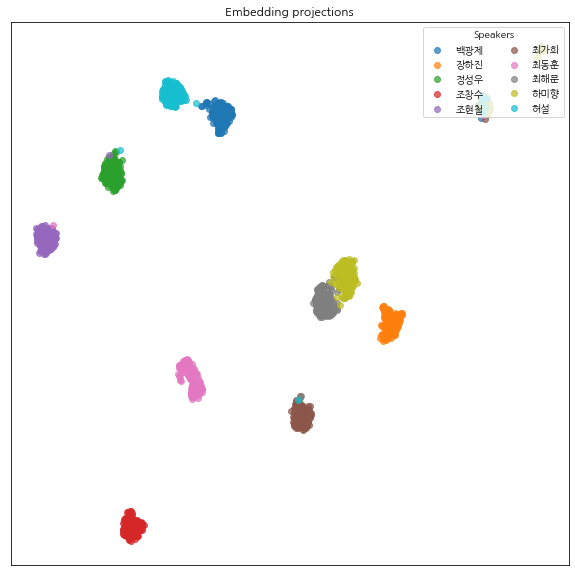

In [60]:
plot_projection_adv(utterance_embeds_2, speakers_2, title="Embedding projections")
plt.show()

### speaker embedding: similarity computation

In [13]:
encoder_new = VoiceEncoder()

Loaded the voice encoder model on cuda in 0.01 seconds.


In [14]:
wav_fpaths = list(Path("audio_data", "iptv_uttr", "sample").glob("**/*.wav"))
# group the wavs per speaker 
speaker_wavs = {speaker: list(map(preprocess_wav, wav_fpaths)) for speaker, wav_fpaths in
                groupby(tqdm(wav_fpaths, "Preprocessing wavs", len(wav_fpaths), unit="wavs", 
                             position=0), lambda wav_fpath: wav_fpath.parent.stem)}

Preprocessing wavs: 100%|██████████| 1580/1580 [00:10<00:00, 145.69wavs/s]


In [15]:
speaker_wavs.keys()

dict_keys(['김윤재', '김훈', '박민선', '류성균', '김진주', '김나영', '박상훈', '김지현', '박지웅', '문성재'])

In [16]:
speaker_wavs.get('김윤재')[:3]

[array([ 0.00051591,  0.00046901,  0.0001407 , ..., -0.0001876 ,
         0.00023451,  0.00042211], dtype=float32),
 array([-0.00054932,  0.00015259, -0.00021362, ...,  0.00064087,
         0.00073242,  0.00033569], dtype=float32),
 array([ 0.0000000e+00,  0.0000000e+00, -3.0885127e-05, ...,
        -1.1118646e-03, -8.3389843e-04, -1.1118646e-03], dtype=float32)]

In [17]:
# wavs[0] : 인간극장 정동원편 틀어주세요
embeds_a = np.array([encoder_new.embed_utterance(wavs[0]) for wavs in speaker_wavs.values()])

# wavs[1] : 우아한 모녀 실행해줘 
embeds_b = np.array([encoder_new.embed_utterance(wavs[1]) for wavs in speaker_wavs.values()])

print("Shape of embeddings: %s" % str(embeds_a.shape))

Shape of embeddings: (10, 256)


In [18]:
# similarity matrix: cosine distance, L2
utt_sim_matrix = np.inner(embeds_a, embeds_b)
utt_sim_matrix2 = np.zeros((len(embeds_a), len(embeds_b))) # long, detailed version

for i in range(len(embeds_a)):
    for j in range(len(embeds_b)):
        utt_sim_matrix2[i, j] = embeds_a[i] @ embeds_b[j]  # np.matmul(embeds_a[i], embeds_b[i])  

assert np.allclose(utt_sim_matrix, utt_sim_matrix2) 

- Similarity between two speaker embeddings
    * Divide the utterances of each speaker in groups of identical size
    * embed each group as a speaker embedding

In [19]:
spk_embeds_a = np.array([encoder_new.embed_speaker(wavs[:len(wavs) // 2]) \
                         for wavs in speaker_wavs.values()])
spk_embeds_b = np.array([encoder_new.embed_speaker(wavs[len(wavs) // 2:]) \
                         for wavs in speaker_wavs.values()])

In [20]:
spk_sim_matrix = np.inner(spk_embeds_a, spk_embeds_b)
labels_a = ["%s-A" % i for i in speaker_wavs.keys()]
labels_b = ["%s-B" % i for i in speaker_wavs.keys()]
mask = np.eye(len(utt_sim_matrix), dtype=np.bool)

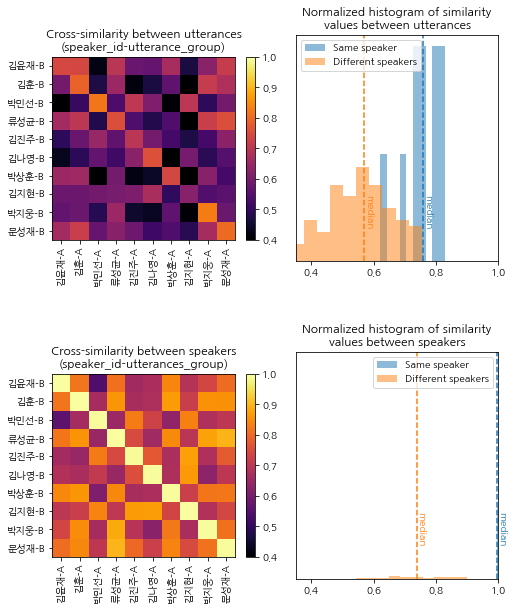

In [107]:
## Draw the plots
fix, axs = plt.subplots(2, 2, figsize=(8, 10))
plt.subplots_adjust(hspace=0.4)
labels_a = ["%s-A" % i for i in speaker_wavs.keys()]
labels_b = ["%s-B" % i for i in speaker_wavs.keys()]
mask = np.eye(len(utt_sim_matrix), dtype=np.bool)

plot_similarity_matrix(utt_sim_matrix, labels_a, labels_b, axs[0, 0],
                       "Cross-similarity between utterances\n(speaker_id-utterance_group)")
plot_histograms((utt_sim_matrix[mask], utt_sim_matrix[np.logical_not(mask)]), axs[0, 1],
                ["Same speaker", "Different speakers"], 
                "Normalized histogram of similarity\nvalues between utterances")

plot_similarity_matrix(spk_sim_matrix, labels_a, labels_b, axs[1, 0],
                       "Cross-similarity between speakers\n(speaker_id-utterances_group)")
plot_histograms((spk_sim_matrix[mask], spk_sim_matrix[np.logical_not(mask)]), axs[1, 1],
                ["Same speaker", "Different speakers"], 
                "Normalized histogram of similarity\nvalues between speakers")
# plt.show()
plt.savefig('result01.png')   

In [21]:
# similarity matrix: cosine distance, L2
utt_sim_matrix = np.inner(embeds_a, embeds_b)
utt_sim_matrix2 = np.zeros((len(embeds_a), len(embeds_b))) # long, detailed version

for i in range(len(embeds_a)):
    for j in range(len(embeds_b)):
        utt_sim_matrix2[i, j] = embeds_a[i] @ embeds_b[j]  # np.matmul(embeds_a[i], embeds_b[i])  

assert np.allclose(utt_sim_matrix, utt_sim_matrix2) 

In [22]:
speaker_wavs.get('김나영')[0]

array([ 0.0000000e+00, -3.3400862e-05, -3.3400862e-05, ...,
        3.6740949e-04,  1.6700431e-04,  4.6761206e-04], dtype=float32)

In [23]:
## Similarity between two utterances from each speaker
# Embed two utterances A and B for each speaker
embeds_a = np.array([encoder.embed_utterance(wavs[0]) for wavs in speaker_wavs.values()])
embeds_b = np.array([encoder.embed_utterance(wavs[1]) for wavs in speaker_wavs.values()])
print("Shape of embeddings: %s" % str(embeds_a.shape))

Shape of embeddings: (10, 256)


In [38]:
utt_sim_matrix2.shape

(10, 10)

<AxesSubplot:title={'center':'Normalized histogram of similarity\nvalues between utterances'}>

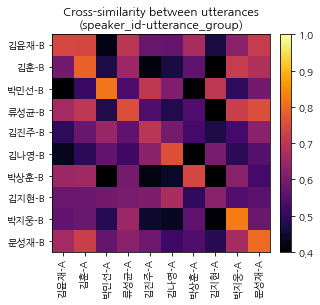

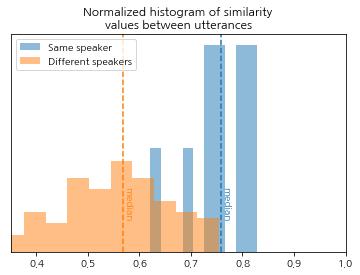

In [111]:
labels_a = ["%s-A" % i for i in speaker_wavs.keys()]
labels_b = ["%s-B" % i for i in speaker_wavs.keys()]
mask = np.eye(len(utt_sim_matrix2), dtype=np.bool)

plot_similarity_matrix(utt_sim_matrix2, labels_a, labels_b, 
                       title="Cross-similarity between utterances\n(speaker_id-utterance_group)")
plot_histograms((utt_sim_matrix2[mask], utt_sim_matrix2[np.logical_not(mask)]), 
                names=["Same speaker", "Different speakers"], 
                title="Normalized histogram of similarity\nvalues between utterances")

<AxesSubplot:title={'center':'Normalized histogram of similarity\nvalues between utterances'}>

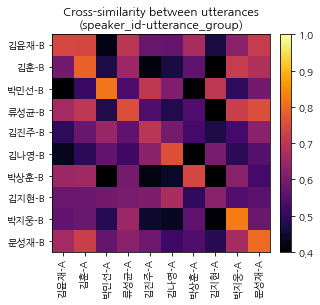

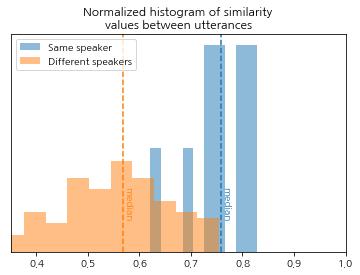

In [112]:
labels_a = ["%s-A" % i for i in speaker_wavs.keys()]
labels_b = ["%s-B" % i for i in speaker_wavs.keys()]
mask = np.eye(len(utt_sim_matrix), dtype=np.bool)

plot_similarity_matrix(utt_sim_matrix, labels_a, labels_b, 
                       title="Cross-similarity between utterances\n(speaker_id-utterance_group)")
plot_histograms((utt_sim_matrix[mask], utt_sim_matrix[np.logical_not(mask)]), 
                names=["Same speaker", "Different speakers"], 
                title="Normalized histogram of similarity\nvalues between utterances")

In [ ]:
encoder = VoiceEncoder()
utterance_embeds = np.array(list(map(encoder.embed_utterance, wavs)))

In [78]:
spk_embeds_a = np.array([encoder.embed_speaker(wavs[:len(wavs) // 2]) \
                         for wavs in speaker_wavs.values()])
spk_embeds_b = np.array([encoder.embed_speaker(wavs[len(wavs) // 2:]) \
                         for wavs in speaker_wavs.values()])
spk_sim_matrix = np.inner(spk_embeds_a, spk_embeds_b)

In [79]:
spk_embeds_total = np.array([encoder.embed_speaker(wavs[:len(wavs)]) \
                         for wavs in speaker_wavs.values()])

In [80]:
spk_embeds_total.shape

(10, 256)

In [3]:
test_path = Path("audio_data", "iptv_uttr", "test", "record_163357.pcm.wav") 
test_path

PosixPath('audio_data/iptv_uttr/test/record_163357.pcm.wav')

In [5]:
Path('audio_data')

PosixPath('audio_data')

In [32]:
sample = preprocess_wav('/home/kwangje/Desktop/sr-iptv-proto/audio_data/iptv_uttr/test/record_163357_pcm.wav')
test_embed = encoder_new.embed_utterance(sample)

In [36]:
sample.arrange(200).reshape(10,20)

AttributeError: 'numpy.ndarray' object has no attribute 'arrange'

In [34]:
test_embed.shape

(256,)

In [ ]:
d[()] = np.arange(200).reshape(10, 20)

In [24]:
#test_path = Path("audio_data", "iptv_uttr", "test", "record_163357_pcm.wav") 
test_path = Path("audio_data", "iptv_uttr", "test", "record_163357.pcm.wav") 
test_wav = preprocess_wav(test_path)
test_embed = encoder_new.embed_utterance(test_wav)

In [27]:
print(test_wav.shape)
print(type(test_wav))

(44160,)
<class 'numpy.ndarray'>


In [28]:
test_wav

array([ 5.9134397e-04, -9.8557328e-05, -4.4350798e-04, ...,
        0.0000000e+00,  6.4062263e-04,  4.9278664e-04], dtype=float32)

In [ ]:
os.path.abspath("file")

In [86]:
spk_sim_matrix = np.inner(spk_embeds_total, test_embed)
spk_sim_matrix

array([0.6364689 , 0.6043494 , 0.6463269 , 0.5718777 , 0.688427  ,
       0.8805681 , 0.65756977, 0.7757151 , 0.56808317, 0.62214327],
      dtype=float32)

In [87]:
labels = [i for i in speaker_wavs.keys()]

In [88]:
stats = dict(zip(labels, spk_sim_matrix))
max(stats, key=stats.get)

'김나영'

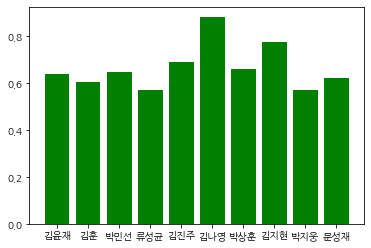

In [89]:
plt.bar(list(stats.keys()), stats.values(), color='g')
plt.show()